Load the dataset

In [3]:
import pandas as pd

# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file with the actual filename
df = pd.read_csv("/content/drive/MyDrive/Datasets/Loan approval dataset .csv")

# Preview first rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Handling missing values

In [8]:
# Check missing values per column
missing = df.isna().sum()
print(missing[missing > 0])

# Categorical columns to fill with mode
cat_cols = [
    'Gender', 'Married', 'Dependents',
    'Self_Employed', 'Credit_History',
    'Loan_Amount_Term'
]

# Fill categorical missing values (no inplace to avoid pandas warning)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode().iat[0])

# Fill numeric missing values with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())


Series([], dtype: int64)


Exploratory Visualizations

In [9]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


Add a Simulated Loan_Status Column

In [10]:
import numpy as np

# Add a simulated Loan_Status column
# 70% of the loans approved ('Y'), 30% rejected ('N')
df['Loan_Status'] = np.random.choice(['Y', 'N'], size=len(df), p=[0.7, 0.3])

# Verify it worked
print(df['Loan_Status'].value_counts())

Loan_Status
Y    267
N    100
Name: count, dtype: int64


Run EDA Visualization

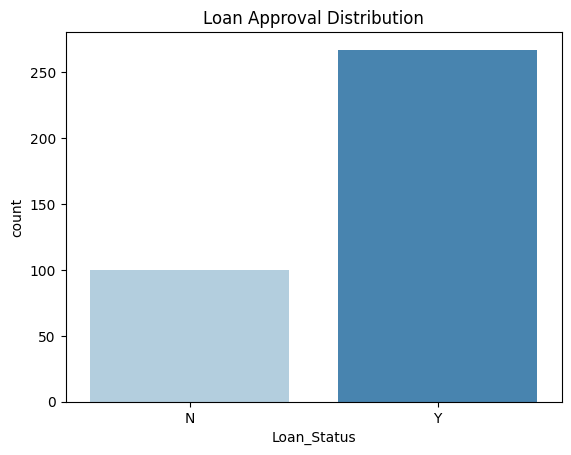

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of approved vs rejected loans
sns.countplot(
    data=df,
    x='Loan_Status',
    hue='Loan_Status',   # required when using palette
    palette='Blues',
    legend=False         # avoids duplicate legend
)

plt.title("Loan Approval Distribution")
plt.show()

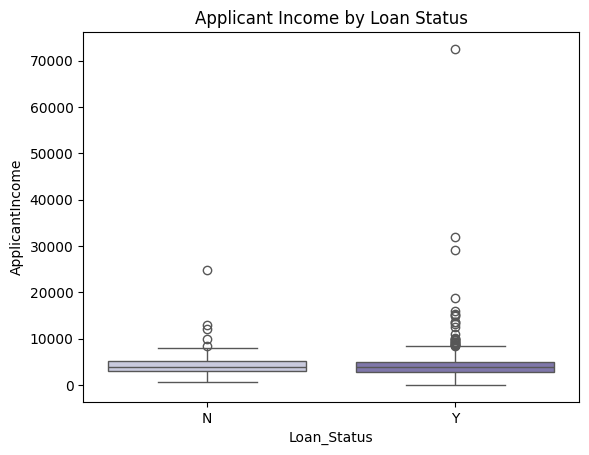

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Applicant income distribution by loan status (warning-free)
sns.boxplot(
    data=df,
    x='Loan_Status',
    y='ApplicantIncome',
    hue='Loan_Status',   # required when using palette
    palette='Purples',
    legend=False         # avoids duplicate legend
)

plt.title("Applicant Income by Loan Status")
plt.show()

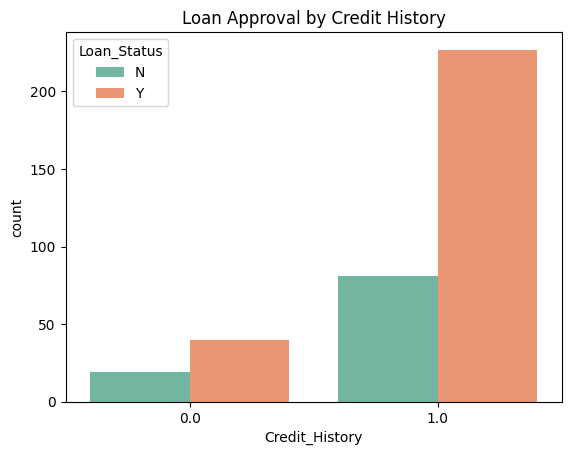

In [15]:
###Credit History Vs Loan Status
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', palette='Set2')
plt.title("Loan Approval by Credit History")
plt.show()

In [16]:
###Cleaned Data Set
from google.colab import files

# Save the cleaned DataFrame to a CSV
df.to_csv("loan_data_cleaned_with_status.csv", index=False)

# Download the file
files.download("loan_data_cleaned_with_status.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>